In [90]:
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import random
from shutil import copyfile, rmtree

In [7]:
path = "./checkpoints/inria/web/images/epoch050_iter434000_synthesized_image.png"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

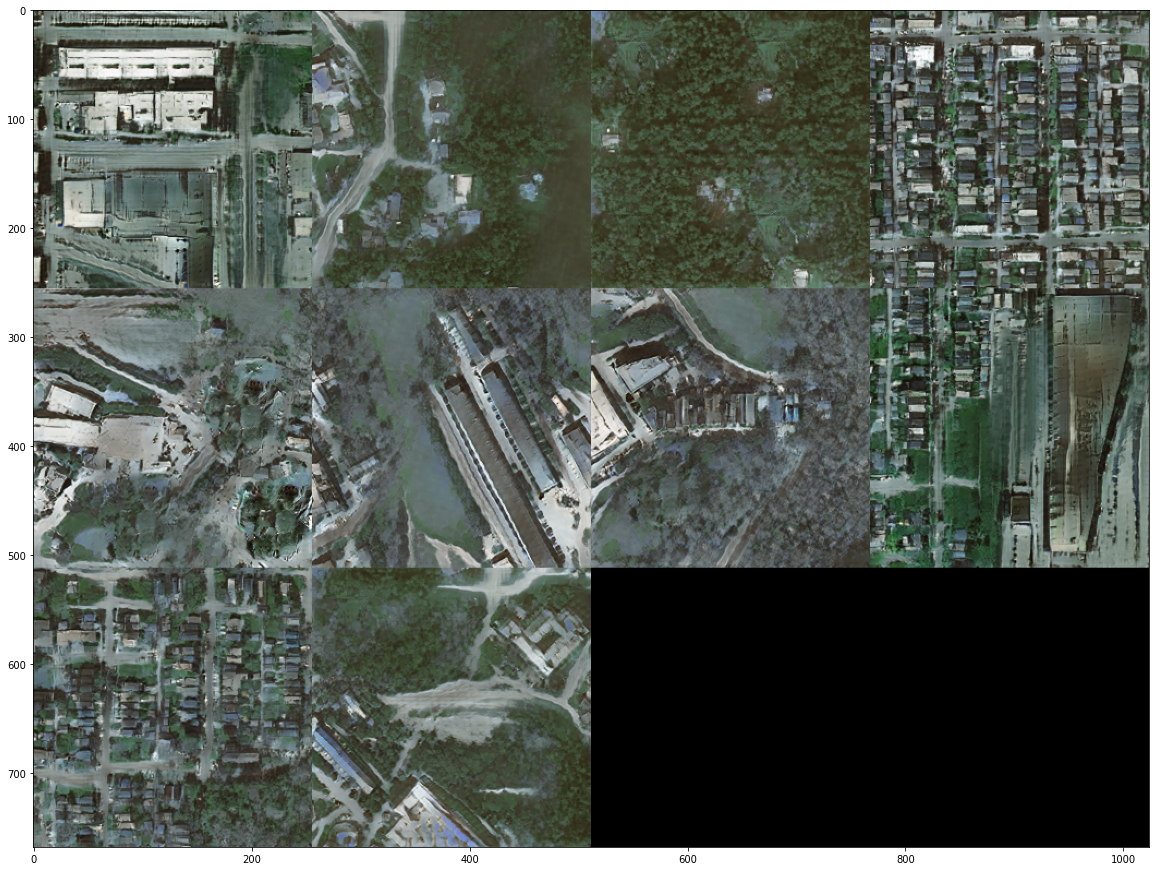

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(img)

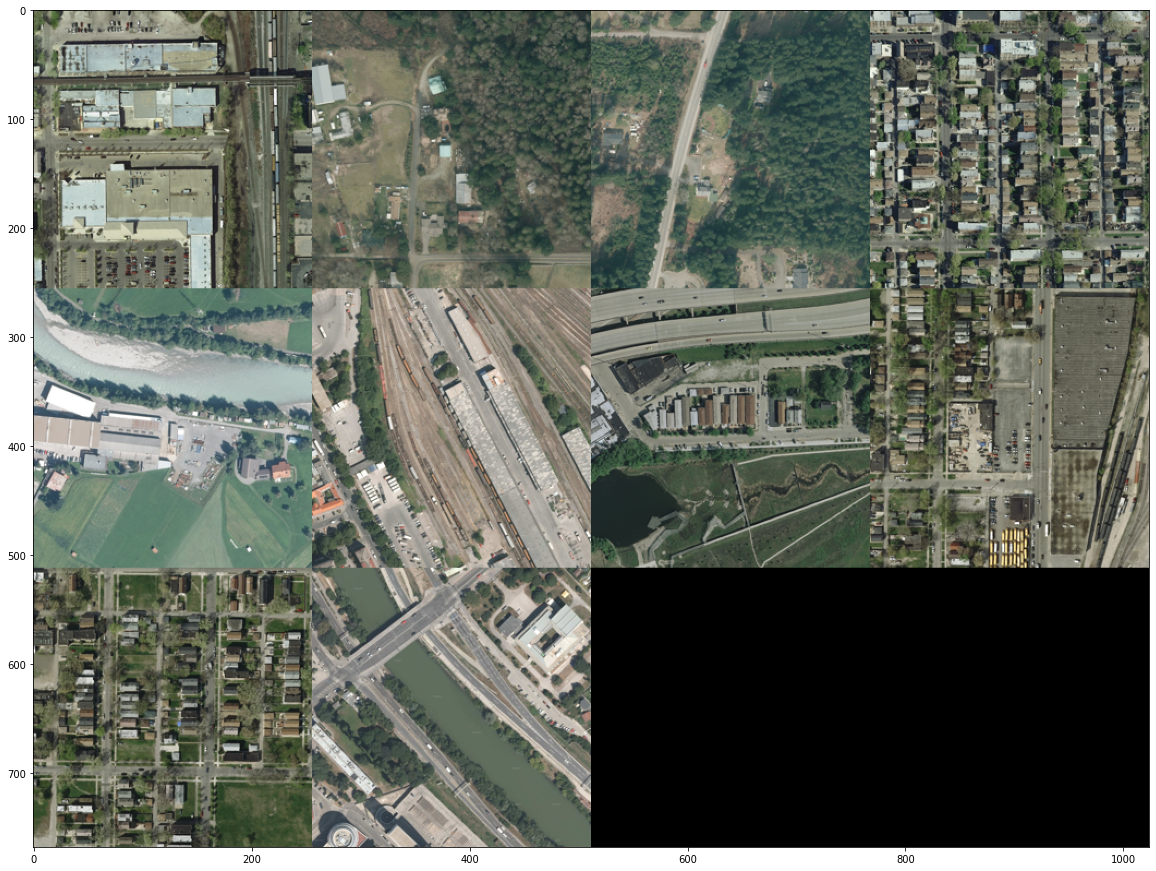

In [12]:
path = "./checkpoints/inria/web/images/epoch050_iter434000_real_image.png"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(20,20))
plt.imshow(img)

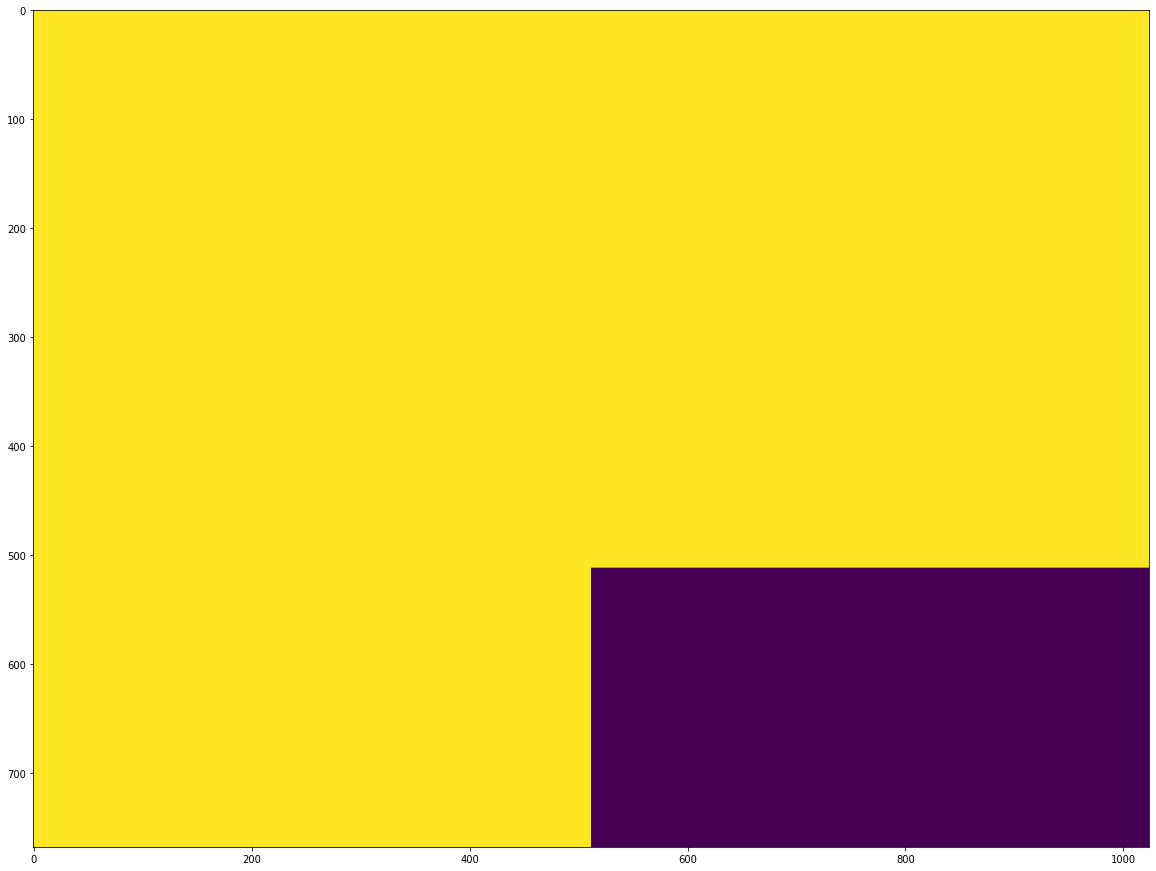

In [44]:
path = "./checkpoints/inria/web/images/epoch050_iter434000_input_label.png"
mask = cv2.imread(path)
plt.figure(figsize=(20,20))
plt.imshow((mask.argmax(axis=2)-1)*255)

 # TEST

In [91]:
print("Select test images")
test_ds = "test_ds"
rmtree(test_ds)
test_imgs = os.path.join(test_ds, "images")
test_gts = os.path.join(test_ds, "gt")
ds_path = "/home/emilioty/workspace/datasets/INRIA_1024_512_background_filtered/train"
images_path = glob(os.path.join(ds_path, "images", "*jpg"))

img_choices= random.choices(images_path, k=10)
os.makedirs(test_ds, exist_ok=True)
os.makedirs(test_imgs, exist_ok=True)
for img in img_choices:
    name = os.path.basename(img)
    copyfile(img, os.path.join(test_imgs,name))
    os.makedirs(test_gts, exist_ok=True)
    copyfile(os.path.join(ds_path,"gt",name), os.path.join(test_gts,name))

print("TEST")
!python test.py --name inria --dataset_mode custom --label_dir /home/emilioty/workspace/SPADE/test_ds/gt --image_dir /home/emilioty/workspace/SPADE/test_ds/images --label_nc 2  --contain_dontcare_label --no_instance

print("VIS")
results_path_synth = "./results/inria/test_latest/images/synthesized_image"
results_path_mask = "./results/inria/test_latest/images/input_label"

for mask in glob(os.path.join(results_path_mask, "*png")):
    
    mask = cv2.imread(mask)
    mask = mask * 255
    name = os.path.basename(mask)
    
    real_img = os.path.join(ds_path, "images", name.replace("png", "jpg"))
    real_img = cv2.imread(real_img)
    real_img = cv2.cvtColor(real_img, cv2.COLOR_RGB2BGR)

    synth_img = os.path.join(results_path_synth, name)
    synth_img = cv2.imread(synth_img)
    synth_img = cv2.cvtColor(synth_img, cv2.COLOR_RGB2BGR)

    plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    plt.imshow(mask)

    plt.subplot(1,3,2)
    plt.imshow(real_img)

    plt.subplot(1,3,3)
    plt.imshow(synth_img)

SyntaxError: invalid syntax (<ipython-input-91-a076334b8151>, line 25)

In [83]:
!ls ./results/inria/test_latest/images

input_label  synthesized_image


In [88]:
img = random.choices(images_path, k=10)